# Proyecto 2 _ Synergy Logistics

Importación de librería pandas y sesborn así como la declaración de variables clave

In [37]:
import pandas as pd
import seaborn as sb

sldb = pd.read_csv('synergy_logistics_database.csv') #csv
exports = sldb[sldb['direction']=='Exports'] #exportaciones
imports = sldb[sldb['direction']=='Imports'] #importaciones

## 1. Rutas de importación y exportación

Función score para determinar la contribución de la ruta considerando el valor total que aporta y las veces que se utiliza.
Para esto primero se ajusta la escala de los valores para que se pueda tomar ambos parametros como iguales, es decir que en el score tengan el mismo peso, utilizando el método de normalización de min-max.

In [38]:
def score(df, minc, maxc, mins, maxs):
    scaled_count = (df.count()['total_value']-minc)/(maxc-minc) #normalizacion del conteo
    scaled_value = (df.sum()['total_value']-mins)/(maxs-mins) #normalización de la suma de total_value
    sc = (scaled_count*.5 + scaled_value*.5) #calculo de score considerando el número de transacciones y el valor total como .5 cada uno
    return '{:,.2%}'.format(sc)

### Top 10 rutas de importación

In [39]:
routes_imports = imports.groupby(['origin','destination','transport_mode'])
min_count = routes_imports.count()['total_value'].min() #valor mínimo en el conteo de transacciones
max_count = routes_imports.count()['total_value'].max() #valor máximo en el conteo de transacciones
min_sum = routes_imports.sum()['total_value'].min() #valor mínimo de valor_total
max_sum = routes_imports.sum()['total_value'].max() #valor máximo de valor_total
    

#Se crea un dataframe con la columna de score, aunado a las columnas de routes_imports
top_imports = pd.DataFrame(routes_imports.apply(lambda x: score(x,min_count,max_count,min_sum,max_sum)).reset_index(name = "score"))
#Se agrega la columna que tiene la suma acumulada de los valores de total_value
top_imports = top_imports.join((routes_imports.sum()['total_value'].reset_index())['total_value'])
#Se agrega la columna que tiene la cantidad de importaciones realizadas 
top_imports = top_imports.join((routes_imports.count()['total_value'].reset_index()).rename(columns={'total_value':'number_imports'})['number_imports'])
#Se corta el dataframe para que tenga los 10 elementos con mayor score
top_imports = top_imports.sort_values(by='score' ,ascending=False,  key=lambda val: val.str.replace('%', '').astype('float64')).head(10)

In [40]:
top_imports

,origin,destination,transport_mode,score,total_value,number_imports
35,Singapore,Thailand,Sea,100.00%,4017000000,273
21,Japan,Mexico,Sea,86.29%,3918000000,206
27,Malaysia,Thailand,Rail,78.71%,3482000000,195
4,China,Japan,Air,78.39%,3237000000,210
10,China,United Arab Emirates,Sea,62.07%,3357000000,114
8,China,Thailand,Road,60.59%,2786000000,145
13,Germany,China,Sea,58.45%,1328000000,233
40,Spain,Germany,Road,50.62%,2044000000,142
32,Mexico,USA,Rail,41.71%,2060000000,93
25,Japan,United Arab Emirates,Sea,40.81%,2238000000,76


### Top 10 rutas de exportación

In [41]:
routes_exports = exports.groupby(['origin','destination','transport_mode'])
min_count = routes_exports.count()['total_value'].min() #valor mínimo en el conteo de transacciones
max_count = routes_exports.count()['total_value'].max() #valor máximo en el conteo de transacciones
min_sum = routes_exports.sum()['total_value'].min() #valor mínimo de valor_total
max_sum = routes_exports.sum()['total_value'].max() #valor máximo de valor_total
    
#Se crea un dataframe con la columna de score, aunado a las columnas de routes_exports
top_exports = pd.DataFrame(routes_exports.apply(lambda x: score(x,min_count,max_count,min_sum,max_sum)).reset_index(name = "score"))
#Se agrega la columna que tiene la suma acumulada de los valores de total_value
top_exports = top_exports.join((routes_exports.sum()['total_value'].reset_index())['total_value'])
#Se agrega la columna que tiene la cantidad de importaciones realizadas 
top_exports = top_exports.join((routes_exports.count()['total_value'].reset_index()).rename(columns={'total_value':'number_exports'})['number_exports'])
#Se corta el dataframe para que tenga los 10 elementos con mayor score
top_exports = top_exports.sort_values(by='score' ,ascending=False,  key=lambda val: val.str.replace('%', '').astype('float64')).head(10)

In [42]:
top_exports

,origin,destination,transport_mode,score,total_value,number_exports
34,China,Mexico,Air,83.17%,12250000000,330
134,South Korea,Vietnam,Sea,78.07%,6877007000,497
25,Canada,Mexico,Rail,60.70%,8450000000,261
108,Netherlands,Belgium,Road,50.78%,3230094000,374
154,USA,Netherlands,Sea,48.06%,1032187000,436
131,South Korea,Japan,Sea,46.78%,4594000000,279
86,Japan,Brazil,Sea,44.49%,3368155000,306
57,Germany,France,Road,41.89%,2902214000,299
52,France,United Kingdom,Sea,36.87%,5427000000,147
152,USA,Mexico,Rail,35.68%,4370000000,178


## 2. Medios de transporte utilizados

### Transporte en importaciones

In [43]:
#Se cuenta el número de transacciones que se hizo para realizar importaciones por medio de transporte
transport_import = imports.groupby('transport_mode')
transport_import = transport_import.sum()['total_value'].sort_values(ascending=False).head(3)
transport_import.reset_index()

,transport_mode,total_value
0,Sea,34938000000
1,Rail,9123000000
2,Road,5990000000


#### Transporte en importaciones por año

[Text(0.5, 1.0, 'Transporte utilizado por año para importaciones')]

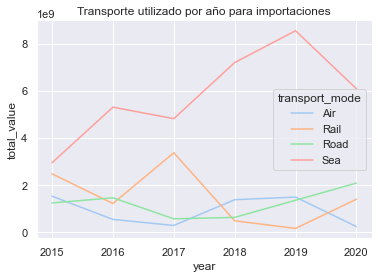

In [44]:
#Se crea un dataframe en donde se agrupan las importaciones por medio de transmporte, año, y suma de total_value
transport_year_imports = imports.groupby(['transport_mode','year']).sum()['total_value'].reset_index()

#Gráfica de transporte utilizado por año para importaciones
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sb.set_theme(style='darkgrid', palette='pastel',rc=custom_params )
sb.lineplot(x='year', y='total_value',
            hue='transport_mode', data=transport_year_imports).set(title='Transporte utilizado por año para importaciones')

In [45]:
#Se cuenta el número de transacciones que se hizo para realizar exportaciones por medio de transporte
transport_export = exports.groupby('transport_mode')
transport_export = transport_export.sum()['total_value'].sort_values(ascending=False).head(3)
transport_export.reset_index()

,transport_mode,total_value
0,Sea,65592622000
1,Rail,34505043000
2,Air,32785147000


#### Transporte en exportaciones por año

[Text(0.5, 1.0, 'Transporte utilizado por año para exportaciones')]

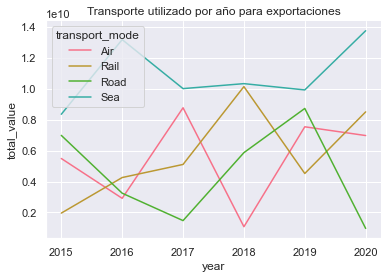

In [46]:
#Se crea un dataframe en donde se agrupan las importaciones por medio de transmporte, año, y suma de total_value
transport_year_exports = exports.groupby(['transport_mode','year']).sum()['total_value'].reset_index()

#Gráfica de transporte utilizado por año para exportaciones
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sb.set_theme(style='darkgrid', palette='husl',rc=custom_params )
sb.lineplot(x='year', y='total_value',
            hue='transport_mode', data=transport_year_exports).set(title='Transporte utilizado por año para exportaciones')

#### Transporte en importaciones por mes en el último año 2020

In [47]:
#Se agrupan los datos de importaciones por fecha, modo de transporte y total value en donde el año sea 2020
transport_month_imports = imports[imports['year'] == 2020].groupby(['transport_mode','date']).sum()['total_value'].reset_index()

#Ciclo para extraer el mes de la fecha y agragarlo como nueva columna
for index, row in transport_month_imports.iterrows():
  _,month,_ = row['date'].split("/") #Se obtine mes del formato de fecha
  transport_month_imports.at[index, 'month'] = month

transport_month = transport_month_imports.sort_values(by='month') #Se ordenan los datos de acuerdo al mes

[Text(0.5, 1.0, 'Transporte utilizado por mes para importaciones en 2020')]

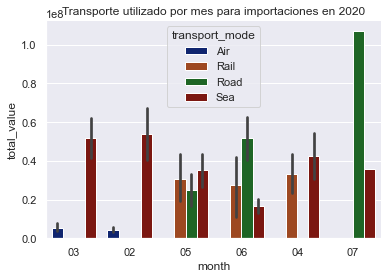

In [48]:
#Gráfica de transporte utilizado por mes para exportaciones en 2020
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sb.set_theme(style='darkgrid', palette='dark',rc=custom_params )
#el eje de x son los meses, y es total value, y se agrupan los datos de acuerdo al medio de transporte
sb.barplot(x='month', y='total_value',
            hue='transport_mode', data=transport_month_imports).set(title='Transporte utilizado por mes para importaciones en 2020')

#### Transporte en exportaciones por mes en el último año 2020

In [49]:
#Se agrupan los datos de exportaciones por fecha, modo de transporte y total value en donde el año sea 2020
transport_month_exports = exports[exports['year'] == 2020].groupby(['transport_mode','date']).sum()['total_value'].reset_index()

#Ciclo para extraer el mes de la fecha y agragarlo como nueva columna
for index, row in transport_month_exports.iterrows():
  _,month,_ = row['date'].split("/") #Se obtine mes del formato de fecha
  transport_month_exports.at[index, 'month'] = month #Se ordenan los datos de acuerdo al mes

transport_month = transport_month_exports.sort_values(by='month') #Se ordenan los datos de acuerdo al mes

[Text(0.5, 1.0, 'Transporte utilizado por mes para exportaciones en 2020')]

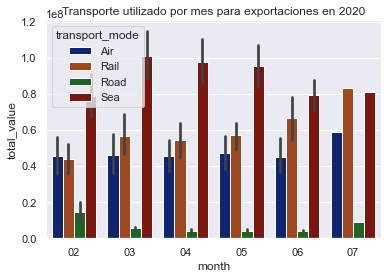

In [50]:
#Gráfica de transporte utilizado por mes para exportaciones en 2020
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sb.set_theme(style='darkgrid', palette='dark',rc=custom_params )
#el eje de x son los meses, y es total value, y se agrupan los datos de acuerdo al medio de transporte
sb.barplot(x='month', y='total_value',
            hue='transport_mode', data=transport_month_exports).set(title='Transporte utilizado por mes para exportaciones en 2020')

## 3. Valor total de importaciones y exportaciones

In [51]:
#Se agrupan los datos de acuerdo al origen de la exportación
value_80_exports = exports.groupby('origin').sum() 
#Se evalua cual es el producto más exportado por país de origen al calcular la moda
top_prod_exports = exports.groupby('origin')['product'].agg(pd.Series.mode)
value_80_exports['top_producto'] = top_prod_exports #Se agrega la moda como mueva columna
total_value = value_80_exports['total_value'].sum() #Se calcula el valor total de las exportaciones
value_80_exports.drop('register_id',axis=1,inplace=True) #Se borra la columna de ids
value_80_exports.drop('year',axis=1,inplace=True) #Se borra la columna de años
#Se crea una columna del porcentaje de valor generado por el país correspondiente 
value_80_exports['porcentaje'] = (value_80_exports['total_value']/total_value)*100 
value_80_exports = value_80_exports.sort_values('porcentaje', ascending=False) #Se ordena la lista  de acuerdo al porcentaje 
acum_value = value_80_exports.cumsum()['porcentaje'] #se acumula el porcentaje en la variable acum_value
value_80_exports['porcentaje_acum'] = acum_value #Se agrega el valor acum_value a una nueva columna
# el dataframe se filtra para que solo contenga las filas en donde el porcentaje acumulado sea menor o igual a 80
value_80_exports = value_80_exports[value_80_exports['porcentaje_acum']<=80] 
value_80_exports = value_80_exports.reset_index() 

In [52]:
value_80_exports

,origin,total_value,top_producto,porcentaje,porcentaje_acum
0,China,32977046000,Computers,20.589640,20.589640
1,France,18614332000,Cosmetics,11.622096,32.211736
2,USA,18355306000,Aerospace Parts,11.460370,43.672105
3,South Korea,14621146000,Integrated circuits,9.128899,52.801004
4,Russia,13223000000,Crude Petroleum,8.255949,61.056953
5,Japan,11948976000,Cars,7.460496,68.517449
6,Germany,11343233000,Cars,7.082292,75.599741


In [53]:
#Se agrupan los datos de acuerdo al destino de la importación
value_80_imports = imports.groupby('destination').sum()
#Se evalua cual es el producto más importado por país de origen al calcular la moda
top_prod_imports = imports.groupby('destination')['product'].agg(pd.Series.mode) 
value_80_imports['top_producto'] = top_prod_imports #Se agrega la moda como mueva columna
total_value = value_80_imports['total_value'].sum() #Se calcula el valor total de las importaciones
value_80_imports.drop('register_id',axis=1,inplace=True) #Se borra la columna de ids
value_80_imports.drop('year',axis=1,inplace=True)#Se borra la columna de años
#Se crea una columna del porcentaje de valor generado por el país correspondiente 
value_80_imports['porcentaje'] = (value_80_imports['total_value']/total_value)*100
value_80_imports = value_80_imports.sort_values('porcentaje', ascending=False) #Se ordena la lista  de acuerdo al porcentaje 
acum_value = value_80_imports.cumsum()['porcentaje'] #se acumula el porcentaje en la variable acum_value
value_80_imports['porcentaje_acum'] = acum_value  #Se agrega el valor acum_value a una nueva columna
# el dataframe se filtra para que solo contenga las filas en donde el porcentaje acumulado sea menor o igual a 80
value_80_imports = value_80_imports[value_80_imports['porcentaje_acum']<=80]
value_80_imports = value_80_imports.reset_index()

In [54]:
value_80_imports

,destination,total_value,top_producto,porcentaje,porcentaje_acum
0,Thailand,13745000000,Integrated circuits,24.753278,24.753278
1,Mexico,8894000000,Cars,16.017145,40.770422
2,United Arab Emirates,7848000000,Computers,14.133410,54.903832
3,Japan,5828000000,Machinery and electronics,10.495606,65.399438
4,Germany,5109000000,Machinery and electronics,9.200764,74.600202
